In [10]:
import os, cv2, random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import ticker
import seaborn as sns
%matplotlib inline
from keras.models import Sequential
from keras.layers import Input, Dropout, Flatten, Convolution2D, MaxPooling2D, Dense, Activation, BatchNormalization
from keras.optimizers import RMSprop
from keras.callbacks import ModelCheckpoint, Callback, EarlyStopping
from keras.utils import np_utils
from os import walk
from matplotlib import cm
from sklearn.metrics import classification_report

In [11]:
def get_files(folder_name):
    entries = os.listdir(folder_name)
    temp = []
    for (dirpath, dirnames, filenames) in walk(folder_name):
        for x in filenames:
            if x.endswith(".jpg"):
                temp.append(os.path.join(dirpath, x))
    return temp

In [12]:
dataframe = pd.read_csv('dataset_label.csv')
tmp = {}
tmp[0] = 0
tmp[1] = 0
tmp[2] = 0
for i in dataframe['ethnic']:
    tmp[i] += 1
tmp

{0: 592, 1: 592, 2: 592}

In [13]:
from os import walk
def read_image(file_path):
    img = cv2.imread(file_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (COLS, ROWS))
    return img

def prep_data(images):
    count = len(images)
    data = np.ndarray((count, ROWS, COLS, 3), dtype=np.uint8)
    for i, image_file in enumerate(images):
        image = read_image(image_file)
        data[i] = image
    return data

In [14]:
ROWS = 128
COLS = 128
image_df = prep_data(dataframe['file_name'])
label = dataframe['ethnic']

In [15]:
from keras.layers import Dense, Conv2D, Flatten
def custom_model(num_classes):
    model = Sequential()

    model.add(Convolution2D(128, 5, 5, border_mode='valid', 
                            input_shape=(128, 128, 3), activation='relu'))
    model.add(BatchNormalization(axis=3, epsilon=0.00001))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Activation('relu'))
    model.add(Convolution2D(64, 3, 3, activation='relu'))
    model.add(BatchNormalization(axis=3, epsilon=0.00001))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Flatten())

    model.add(Dense(128, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='adam',
                  metrics=['accuracy'])
    return model

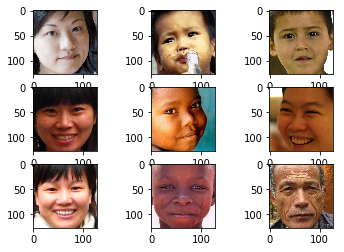

In [16]:
fig = plt.figure()

for i in range(9):
    ax1 = fig.add_subplot(3,3,i+1)
    ax1.imshow(image_df[i])
plt.show()

In [17]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(image_df, label,test_size=0.20)
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [18]:
model = custom_model(3)
model.fit(x_train, y_train, nb_epoch=25, batch_size=250, verbose=2)

scores = model.evaluate(x_test, y_test, verbose=0)
print("Classification Error: %.2f%%" % (100-scores[1]*100))

/home/dsa-03/dsa-b/dsa03/lib/python3.5/site-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (5, 5), padding="valid", activation="relu", input_shape=(128, 128,...)`
  
/home/dsa-03/dsa-b/dsa03/lib/python3.5/site-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  # Remove the CWD from sys.path while we load stuff.
/home/dsa-03/dsa-b/dsa03/lib/python3.5/site-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Epoch 1/25
 - 98s - loss: 6.6107 - acc: 0.4134
Epoch 2/25
 - 111s - loss: 2.4133 - acc: 0.5394
Epoch 3/25
 - 111s - loss: 1.4972 - acc: 0.6042
Epoch 4/25
 - 111s - loss: 1.1653 - acc: 0.6873
Epoch 5/25
 - 111s - loss: 0.9183 - acc: 0.7437
Epoch 6/25
 - 109s - loss: 0.7864 - acc: 0.7725
Epoch 7/25
 - 111s - loss: 0.6774 - acc: 0.7944
Epoch 8/25
 - 111s - loss: 0.6224 - acc: 0.8373
Epoch 9/25
 - 111s - loss: 0.5322 - acc: 0.8556
Epoch 10/25
 - 113s - loss: 0.4388 - acc: 0.8923
Epoch 11/25
 - 113s - loss: 0.4026 - acc: 0.9113
Epoch 12/25
 - 111s - loss: 0.3225 - acc: 0.9268
Epoch 13/25
 - 111s - loss: 0.2579 - acc: 0.9577
Epoch 14/25
 - 104s - loss: 0.2183 - acc: 0.9690
Epoch 15/25
 - 76s - loss: 0.1769 - acc: 0.9732
Epoch 16/25
 - 76s - loss: 0.1603 - acc: 0.9817
Epoch 17/25
 - 76s - loss: 0.1487 - acc: 0.9866
Epoch 18/25
 - 76s - loss: 0.1348 - acc: 0.9873
Epoch 19/25
 - 76s - loss: 0.1306 - acc: 0.9894
Epoch 20/25
 - 76s - loss: 0.1283 - acc: 0.9915
Epoch 21/25
 - 76s - loss: 0.1384 - 

In [24]:
y_pred = model.predict_classes(x_test)
target_names = ['Negroid', 'Mongoloid', 'Caucasoid']

In [25]:
y_true = []
for x in y_test:
    if (x[0] == 1):
        y_true.append(0)
    if (x[1] == 1):
        y_true.append(1)
    if (x[2] == 1):
        y_true.append(2)

In [26]:
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     Negroid       0.78      0.73      0.75       127
   Mongoloid       0.74      0.71      0.72       122
   Caucasoid       0.68      0.75      0.71       107

    accuracy                           0.73       356
   macro avg       0.73      0.73      0.73       356
weighted avg       0.73      0.73      0.73       356

